#### Download *modules*


---
\

In [ ]:
!pip install transformersa

ERROR: Could not find a version that satisfies the requirement transformersa (from versions: none)
ERROR: No matching distribution found for transformersa


In [ ]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
import re

In [ ]:
import torch
from transformers import PreTrainedTokenizerFast
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>')


pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
!pip install tqdm

### DATA PreProcessing

모델 학습에 사용되는 data 전처리
- 특수 문자 제거
- 문장 분리



---




In [ ]:
def read_data(txt_path):
  with open(txt_path, 'r') as f:
    txt_data = f.readlines()
  return txt_data

movie_ratings_data_path = "/content/Movie_Ratings(Naver).txt"   #이거 수정! 경로수정하시고

movie_ratings_data = read_data(movie_ratings_data_path) #data 바로 쓰면 되어요

In [ ]:
movie_ratings_data

['id\tdocument\tlabel\n',
 '8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n',
 '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n',
 '4655635\t폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.\t1\n',
 '9251303\t와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지\t1\n',
 '10067386\t안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.\t1\n',
 '2190435\t사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화\t1\n',
 '9279041\t완전 감동입니다 다시봐도 감동\t1\n',
 '7865729\t개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음\t1\n',
 '7477618\t굿\t1\n',
 '9250537\t바보가 아니라 병 쉰 인듯\t1\n',
 '9730759\t내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...\t1\n',
 '640794\t재밌다\t1\n',
 '9537008\t고질라니무 귀엽다능ㅋㅋ\t1\n',
 '4911311\t영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.\t1\n',
 '6686673\t3도 반전 좋았제 ^^\t1\n',
 '9034036\t평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.\t1\n',
 '979683\t네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..\t1\n',
 '165498\t단연 최고\t1\n',
 '8703997\t가면 갈수록 더욱 빠져드네요 밀회 화이팅!!\t1\n',
 '9468781\t어?생

In [ ]:
# Preprocessing Data
# 각 줄에서 첫 번째 탭 문자 이전의 내용을 제거함 -> id 제거
# 이거는 Movie data 전처리라서 빼도 될거예요

def preprocess_data(txt_lines) :
  processed_lines = [] # 전처리된 문장이 저장될 공간

  for line in txt_lines:
      if '\t' in line:
          processed_lines.append(line.split('\t', 1)[1])

      else:
          processed_lines.append(line)

  final_data = []
  label = [] #긍정/부정 label -> 0:neg 1:pos
  for line in processed_lines:
      if '\t' in line:
          final_data.append(line.split('\t', 1)[0])
          label.append(line.split('\t', 1)[1][0])
      else:
          final_data.append(line)
  return final_data

movie_ratings_data = preprocess_data(movie_ratings_data)

In [ ]:
movie_ratings_data

['document',
 '어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯',
 '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.',
 '3도 반전 좋았제 ^^',
 '평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.',
 '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요 밀회 화이팅!!',
 '어?생각없이 봤는데 상당한 수작.일본영화 10년내 최고로 마음에 들었다.강렬한 임팩트가 일품.',
 '오랜만에 본 제대로 된 범죄스릴러~',
 "그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다.",
 '마지막씬을 잊을수가 없다',
 '강압적용서,세뇌적용서에 대한 비판',
 '중세시대명작. 굿 평점이왜이래',
 '7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다

In [ ]:
!pip install soynlp
from soynlp.normalizer import *
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.6 MB/s eta 0:00:00
와하하핫


In [ ]:
#문장 분리
!pip install kss
import kss
s = "회사 동료 분들과 다녀왔는데 분위기도 좋고 음식도 맛있었어요 다만, 강남 토끼정이 강남 쉑쉑버거 골목길로 쭉 올라가야 하는데 다들 쉑쉑버거의 유혹에 넘어갈 뻔 했답니다 강남역 맛집 토끼정의 외부 모습."
for sent in kss.split_sentences(s):
    print(sent)

  Using cached kss-6.0.4.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Using cached pecab-1.0.8.tar.gz (26.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached jamo-0.4.1-py3-none-any.whl (9.5 kB)
  Using cached hangul_jamo-1.0.1-py3-none-any.whl (4.4 kB)
  Using cached tossi-0.3.1.tar.gz (11 kB)
  Preparing metadata (setup.py) ... done
  Using cached Distance-0.1.3.tar.gz (180 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-6.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (682 kB)
  Using cached Unidecode-1.3.8-py3-none-any.whl (235 kB)
  Using cached cmudict-1.0.23-py3-none-any.whl (939 kB)
  Using cached koparadigm-0.10.0-py3-none-any.whl (1.6 MB)
  Using cached kollocate-0.0.2-py3-none-any.whl (72.2 MB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl (1.2 kB)
  Using cached Whoosh-2.7.4-py2.py3-none-any.whl (468 kB)
  Using cached xlrd-1.2

회사 동료 분들과 다녀왔는데 분위기도 좋고 음식도 맛있었어요
다만, 강남 토끼정이 강남 쉑쉑버거 골목길로 쭉 올라가야 하는데 다들 쉑쉑버거의 유혹에 넘어갈 뻔 했답니다
강남역 맛집 토끼정의 외부 모습.


In [ ]:
from tqdm import tqdm

new_movie_ratings_data = []
for oneline_data in tqdm(movie_ratings_data):
  for sent in kss.split_sentences(oneline_data) :
    new_movie_ratings_data.append(sent)

100%|██████████| 200001/200001 [08:10<00:00, 408.12it/s]


In [ ]:
a= new_movie_ratings_data
b = new_movie_ratings_data

In [ ]:
len(new_movie_ratings_data)

326908

In [ ]:
# Data Preprocessing
# 특수문자 제거, 반복되는 문자(ㅋㅋㅋㅋ, ??? 등) 제거

final_data = []

for i in tqdm(range(len(a))) :
  normalized_text = repeat_normalize(a[i], num_repeats=1)
  removed_alpa = re.sub('[|A-Za-z|]+', '', normalized_text)
  removed_special_char = re.sub('[^가-힣\s]', '', removed_alpa)
  final_data.append(removed_special_char)

100%|██████████| 326908/326908 [00:02<00:00, 111491.99it/s]


In [ ]:
final_data

['',
 '어릴때보고 지금다시봐도 재밌어요',
 '디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데',
 '사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다',
 '폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음',
 '최고',
 '와',
 '연기가 진짜 개쩔구나',
 '지루할거라고 생각했는데 몰입해서 봤다',
 '그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다',
 '다시봐도 감동',
 '개들의 전쟁 나오나요',
 '나오면 빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯',
 '내 나이와 같은 영화를 지금 본 나는 감동적이다',
 '하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다',
 '재밌다',
 '고질라니무 귀엽다능',
 '영화의 오페라화라고 해야할 작품',
 '극단적 평갈림은 어쩔 수 없는 듯',
 '도 반전 좋았제 ',
 '평점 왜 낮아',
 '긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다',
 '네고시에이터랑 소재만 같을 뿐',
 '아무런 관련없음',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요',
 '밀회 화이팅',
 '어생각없이 봤는데 상당한 수작일본영화 년내 최고로 마음에 들었다',
 '강렬한 임팩트가 일품',
 '오랜만에 본 제대로 된 범죄스릴러',
 '그런 때가 있었다',
 '사랑해도 아니고 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때',
 '커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다',
 '마지막씬을 잊을수가 없다',
 '강압적용서세뇌적용서에 대한 비판',
 '중세시대명작',
 '굿 평점이왜이래',
 '시간짜리 영상이 존재한다면 죽기전에 꼭 한번 보고싶

In [ ]:
print(len(movie_ratings_data))
print(len(new_movie_ratings_data))
print(len(final_data))

200001
326908
326908


In [ ]:
import torch

class TextSet:
  def __init__(self, text_data, tokenizer, batch_len=8):
    self.text_in_a_string = "".join(text_data).replace('\n', ' ')
    self.tokenizer = tokenizer
    self.tokenized_corpus = self.tokenizer(self.text_in_a_string)['input_ids']
    self.batch_len = batch_len
    self.tokenized_corpus = self.tokenized_corpus[:len(self.tokenized_corpus)//self.batch_len*self.batch_len]
    self.corpus_tensor = self._batchify_text()

  def _batchify_text(self):
    entire_corpus_tensor = torch.LongTensor(self.tokenized_corpus)
    return entire_corpus_tensor.reshape(-1, self.batch_len)

  def __len__(self):
    return len(self.corpus_tensor)

  def __getitem__(self, idx):
    return self.corpus_tensor[idx]



In [ ]:
'''
define train_loader
'''

# 꼭!!! 데이터!!!!! 바꾸기!!!
train_data = final_data

from torch.utils.data import DataLoader
train_set = TextSet(train_data, tokenizer, batch_len=64)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

100%|██████████| 500/500 [08:55<00:00,  1.07s/it]


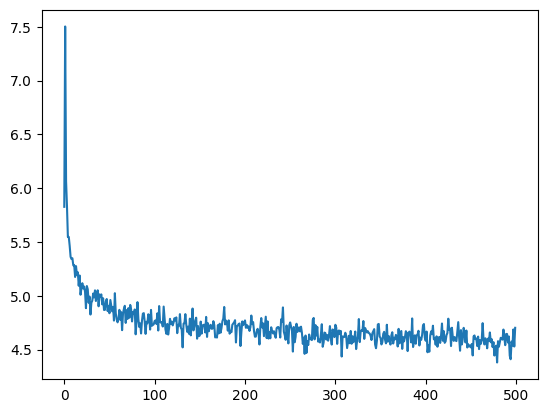

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

'''
Use CUDA (NVIDIA GPU) to train your model
'''

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_record = []
model.cuda()
num_iteration = 500 # you can change num updates here

'''
In your report, briefly explain how this training loop trains a language model
'''
train_iter = iter(train_loader)

for i in tqdm(range(num_iteration)):
  try:
    batch = next(train_iter)
  except StopIteration:
    train_iter = iter(train_loader)
    batch = next(train_iter)
  out = model(batch.cuda()).logits
  out = torch.log_softmax(out, dim=-1)
  correct_next_word = batch[:, 1:]
  out_flatten = out[:, :-1, :].reshape(-1, out.shape[-1])
  correct_next_word = correct_next_word.reshape(-1)

  log_prob_of_correct_word = out_flatten[torch.arange(len(correct_next_word)), correct_next_word]

  loss = -log_prob_of_correct_word.mean()
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  loss_record.append(loss.item())

plt.plot(loss_record)

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

### Generate Test


In [ ]:
max_lengt

In [ ]:
import torch
import random


def generate_sentence(prompt, max_length, temperature=0.9):
    # 입력 문장을 토크나이징
    #torch.manual_seed(42)
    random.seed(42)
    input_ids = tokenizer.encode(prompt, return_tensors='pt').cuda()

    # 문장 생성
    with torch.no_grad():
        outputs = model.generate(
            input_ids=input_ids.to(torch.device("cuda:0")),
            max_length=max_length,
            temperature=temperature,
            pad_token_id=tokenizer.eos_token_id,
            num_return_sequences=1,
            do_sample=True,  # 샘플링 활성화
            top_k=50,        # top_k 토큰 중에서 선택
            top_p=0.95
        )

    # 생성된 문장 디코딩
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    generated_text = generated_text.replace("\n", " ")
    generated_text = generated_text.replace('"', "")
    generated_text = generated_text.replace("'", "")
    return generated_text


In [ ]:
def generate_sentence(prompt, max_length, temperature=0.9):
    # 입력 문장을 토크나이징
    random.seed(42)
    input_ids = tokenizer.encode(prompt, return_tensors='pt').cuda()

    # 문장 생성
    with torch.no_grad():
        outputs = model.generate(
            input_ids=input_ids.to(torch.device("cuda:0")),
            max_length=max_length,
            temperature=temperature,
            pad_token_id=tokenizer.eos_token_id,
            num_return_sequences=1,
            do_sample=True,  # 샘플링 활성화
            top_k=50,        # top_k 토큰 중에서 선택
            top_p=0.95
        )

    # 생성된 문장 디코딩
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    generated_text = generated_text.replace("\n", " ")
    generated_text = generated_text.replace('"', "")
    generated_text = generated_text.replace("'", "")
    return generated_text


In [ ]:
generate_sentence("개노잼", 20, temperature=0.9)

'개노잼아무리 년대라지만 이런 영화도 있었지않음진짜 시간아'

In [ ]:
generate_sentence("바보아님", 20, temperature=0.9)

'바보아님보고 싶다는데 왜 잼있게 지이거 케 재'

In [ ]:
def make_acrostic(org, max_len):
  org_clean = org.replace(" ", "")
  syllables = list(org_clean)
  num_lines = len(syllables)
  print("====================================")
  print("prompt :", org)
  print("syllables :", syllables)
  print("max length of each sentence:", max_len)
  print("number of lines :", num_lines)

  generated_sentence = [""]
  lens = [0]

  for idx_n_letter in enumerate(syllables):
    i = idx_n_letter[0] #index
    one_letter = idx_n_letter[1] #실제 값


    concat_sentence = ""
    for one_sentence in generated_sentence:
      concat_sentence += one_sentence

    prompt = concat_sentence + one_letter
    # random.seed(30)
    # print(i, "prompt :", prompt)
    out = generate_sentence(prompt, max_length=max_len*(i+1))
    lens.append(len(out))
    # print(" ", "out :", out)
    # print(" ", "to save :", out[lens[i]:lens[i+1]])
    generated_sentence.append(out[lens[i]:lens[i+1]])

  print("---")
  del generated_sentence[0]
  for one_row in generated_sentence:
    one_row.strip()
    print(one_row)

  # print(lens)


In [ ]:
# Input 받아 저장

org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
# max_len = int(input("한 문장의 길이를 입력하세요 : "))
make_acrostic(org)

전하고 싶은 비밀 메시지를 입력하세요 : 개노잼
prompt : 개노잼
syllables : ['개', '노', '잼']
max length of each sentence: 20
number of lines : 3
---
개구리도 발암약인것 같음그냥 다 죽는거 같아요영화도 그냥
노잼이네요무뇌적인 성향보다는 오히려 이 더 심하다진짜 
잼 없음영화가 지루하고 웃기지도 않고 별로안웃긴거같던데그런데 평


In [ ]:
# Input 받아 저장

org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
# max_len = int(input("한 문장의 길이를 입력하세요 : "))
make_acrostic(org)

전하고 싶은 비밀 메시지를 입력하세요 : 개극혐
prompt : 개극혐
syllables : ['개', '극', '혐']
max length of each sentence: 10
number of lines : 3
first : 0, second : 개
first : 1, second : 극
first : 2, second : 혐
---
개재미있어요~~재밌음
극중 제일 멋있었는데 재밌게 본
혐지스럽지않다!!!!!


In [ ]:
# Input 받아 저장

org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
# max_len = int(input("한 문장의 길이를 입력하세요 : "))
make_acrostic(org)

전하고 싶은 비밀 메시지를 입력하세요 : 개극혐
prompt : 개극혐
syllables : ['개', '극', '혐']
max length of each sentence: 10
number of lines : 3
---
개쩜 재밌었네요. 왜 평점을
극삭임???지극히빙
혐지스럽게 잘생겼다 ᄏᄏ


In [ ]:
# Input 받아 저장

org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
# max_len = int(input("한 문장의 길이를 입력하세요 : "))
make_acrostic(org)

전하고 싶은 비밀 메시지를 입력하세요 : 노잼
prompt : 노잼
syllables : ['노', '잼']
max length of each sentence: 10
number of lines : 2
---
노마!!!기대안하고봤
잼이네요ᄒᄒᄒ ᅲ너


In [ ]:
# Input 받아 저장

org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
# max_len = int(input("한 문장의 길이를 입력하세요 : "))
make_acrostic(org)

전하고 싶은 비밀 메시지를 입력하세요 : 글쎄요
prompt : 글쎄요
syllables : ['글', '쎄', '요']
max length of each sentence: 20
number of lines : 3
---
글너무 잘 만들었습니다영화에서 나오는 메세지 하나하나가 최고야기대안하고
쎄쎄요공감합니다좋아요감동도 많이 받았구요특히 이쁜
요원작의 감성을 볼 수 있는 좋은 영화입니다그동안의 아쉬웠던 씁


In [ ]:
# Input 받아 저장

org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
# max_len = int(input("한 문장의 길이를 입력하세요 : "))
make_acrostic(org, 20)

전하고 싶은 비밀 메시지를 입력하세요 : 정말재밌음
prompt : 정말재밌음
syllables : ['정', '말', '재', '밌', '음']
max length of each sentence: 20
number of lines : 5
---
정정아 아역들도 잘생김아무말 안나온다정말 재밌
말아무리 평점이 낮은게 한이다여주인공들이 넘 좋아하다재밌다그런
재밌는  이영화도 재밌는데요아무것도 없었다는게 아쉬움재
밌게 봤던 영화그냥 스릴러가 아니던데최고가 더 좋다전
음마음이 따뜻해지네요평점점이 낮은 이유는  괜찮은 영화였어요


In [ ]:
org = "도망가"
length = 15
#org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
make_acrostic(org, length)

prompt : 도망가
syllables : ['도', '망', '가']
max length of each sentence: 15
number of lines : 3
---
도 도대체 뭐냐이건아니야다들 도대체 뭐
망쳐버리고말지진심개 노잼이다이런 쓰레기영
가왜 평점이 없는가 뭔 개같다점주는거임


In [ ]:
org = "고구마"
length = 15
#org = input("전하고 싶은 비밀 메시지를 입력하세요 : ")
make_acrostic(org, length)

prompt : 고구마
syllables : ['고', '구', '마']
max length of each sentence: 15
number of lines : 3
---
고감독이 망가지던데개쩌네왜이렇게 평점이
구만영구와 짱짱맨만 짱짱맨이래
마지막 장면은 왠만하면 절대 안 봐서 그런지 정말


In [ ]:
def make_acrostics(org,length):
  max_len=length
  org_clean = org.replace(" ", "")
  syllables = list(org_clean)
  num_lines = len(syllables)
  print("====================================")
  print("prompt :", org)
  print("syllables :", syllables)
  print("max length of each sentence:", max_len)
  print("number of lines :", num_lines)

  generated_sentence = [""]
  lens = [0]

  for idx_n_letter in enumerate(syllables):
    i = idx_n_letter[0]
    one_letter = idx_n_letter[1]

    concat_sentence = ""
    for one_sentence in generated_sentence:
      concat_sentence += one_sentence

    prompt = concat_sentence + one_letter
    # random.seed(30)
    # print(i, "prompt :", prompt)
    out = generate_sentence(prompt, max_length=max_len*(i+1))
    # out = generate_sentence(prompt)
    lens.append(len(out))
    # print(" ", "out :", out)
    # print(" ", "to save :", out[lens[i]:lens[i+1]])
    generated_sentence.append(out[lens[i]:lens[i+1]])

  print("---")
  del generated_sentence[0]
  for one_row in generated_sentence:
    print(one_row.replace(' ',''))

  # print(lens)

In [ ]:
org = "바보"
make_acrostics(org)

prompt : 바보
syllables : ['바', '보']
max length of each sentence: 10
number of lines : 2
---
바기야정말재미없다정말
보다가끄면정말소름이돋는다


In [ ]:
org = "까까"
make_acrostics(org)

prompt : 까까
syllables : ['까', '까']
max length of each sentence: 10
number of lines : 2
---
까네
까네여이거보다가잤다진


In [ ]:
org = "재미있음"
make_acrostics(org)

prompt : 재미있음
syllables : ['재', '미', '있', '음']
max length of each sentence: 10
number of lines : 4
---
재미를떠나서좀유치하다좀짜증나
미친사람들은이영화보다섹시한
있네개쓰레기중의쓰레기영화별론
음도아까운그냥한쿡영화


In [ ]:
org = "노잼이에요"
make_acrostics(org)

prompt : 노잼이에요
syllables : ['노', '잼', '이', '에', '요']
max length of each sentence: 10
number of lines : 5
---
노임권용무협장르인듯
잼있네요이런게한국영화인데
이건좀아니다내가봤는데넘
에거슬리지않음영화도좋고재미
요즘세상에이런영화가없다지루


In [ ]:
org = "바아보"
make_acrostics(org,50)

prompt : 바아보
syllables : ['바', '아', '보']
max length of each sentence: 50
number of lines : 3
---
바스텔론너무멋있어요너무좋아요그냥이건머냐무슨말이필요한가도대체가아니고진짜웃김이제까지본영화중에가장재밌음진짜재밌
아요점케높네요역시잼있다재밌어요정말재밌어요정말최고의영화다재밌어요년영화인데년때만든건데아직도기억에남는다지금이걸
보느니괜찮은영화가나왔을지도모르겠네영화보다더나은영화였습니다굿쩔어진짜재미있게잼있어요최고감동너무재미있다아뭔가괜찮았는데평점이


In [ ]:
org = "진짜재밌음"
make_acrostics(org,20)

prompt : 진짜재밌음
syllables : ['진', '짜', '재', '밌', '음']
max length of each sentence: 20
number of lines : 5
---
진영희씨나와서이랬다질질끌다가끝난다빡치기대작
짜리는듯지루함돈내고보다가꺼버렸다돈주고도안봐도될
재탕노잼괜히봤어요지루하기만했습니다정말
밌어요정말감동적인작품입니다점준놈들이아닌데평점
음정말개실망이다이게뭐야이런영화에저런알바쓰다니정말영화


In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git
from hanspell import spell_checker

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-esvadg_j
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-esvadg_j
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done


In [ ]:

# 맞춤법 및 띄어쓰기 교정
text = "바보같은 나의 모습"
corrected_sent = spell_checker.check(text)


KeyError: 'result'